### Tutorial 1 - Simple metrics over time
 - Loading the query results via pandas
 - Calculate and plot the number of publications for each year in the query
 - Get the number of unique active and new authors per year

In [139]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib widget

### Set the query ID here

In [152]:
queryID = "DEMO_Scientometrics_OnlyPapers"

# queryID = "DEMO_Networks_OnlyPapers"
# or use the queryID provided by a query, such as
# queryID = "NatureQuery_0e367ff2-8670-454b-9b31-ca4d0d85fe96"

In [153]:
def getDataFromQuery(queryID):
    if(queryID.startswith("DEMO_")):
        # if _DEMO_ is used, the data will be loaded from the demo queries instead
        queryResultsPath = Path("./demo_queries/")
        queryID = queryID.replace("DEMO_","")
    else:
        queryResultsPath = Path("../query-results/")
    return pd.read_csv(queryResultsPath/("%s.csv"%queryID))

In [154]:
dfQuery = getDataFromQuery(queryID)
# dfQuery = getDataFromQuery("DEMO_Networks_OnlyPapers")


In [155]:
publicationsByYear = dfQuery['Paper_year'].value_counts().sort_index()

#### Getting and plotting number of publications by year
Pandas can be used to handle the dataset and extract the number of publications

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

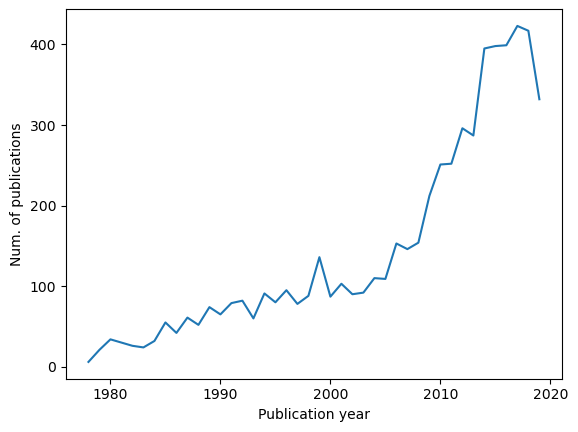

In [156]:
#removing last year as it may be incomplete
ax = publicationsByYear.iloc[0:-1].plot();
ax.set_xlabel("Publication year");
ax.set_ylabel("Num. of publications");

In [157]:
year2Authors = {}
if "Author_authorId" in dfQuery.columns:
    queryAuthors = dfQuery["Author_authorId"]
else:
    queryAuthors = dfQuery["Author_normalizedName"]
    
for authorList,year in zip(queryAuthors,dfQuery["Paper_year"]):
#     authorList = 
    authorList = [name.strip() for name in authorList[1:-1].split(",")]
    if year not in year2Authors:
        year2Authors[year] = set()
    year2Authors[year].update(authorList)
    

#### Getting authors count
Calculating new and active authors for each year in the query

In [158]:
newAuthorsCount = []
activeAuthorsCount = []
years = []

previousAuthors = set()
for year, authors in sorted(year2Authors.items(), key=lambda x: x[0]):
    if(year==2021):
        # drop incomplete year
        continue
    years.append(year)
    newAuthorsCount.append(len(authors-previousAuthors))
    activeAuthorsCount.append(len(authors))
    previousAuthors.update(authors)
    
dfAuthorsCounts = pd.DataFrame(zip(years,activeAuthorsCount,newAuthorsCount),
                               columns=["Publication year","Active authors","New authors"])


##### Plotting the number of new active and new authors in the query

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

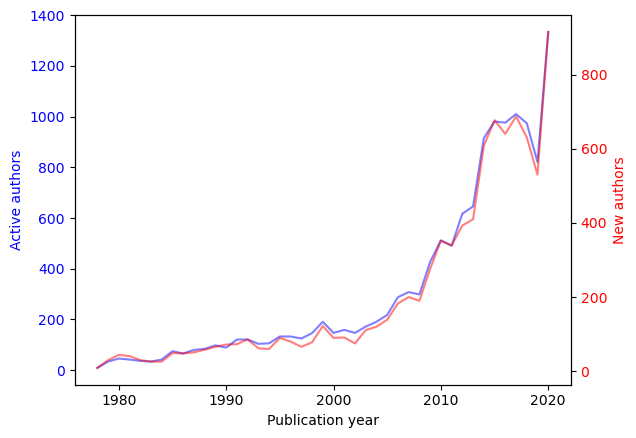

In [159]:
fig, ax1 = plt.subplots()
ax1.plot(dfAuthorsCounts['Publication year'], dfAuthorsCounts['Active authors'], 'b-',alpha=0.5)
ax1.set_xlabel('Publication year')
ax1.set_ylabel('Active authors', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
ax2.plot(dfAuthorsCounts['Publication year'], dfAuthorsCounts['New authors'], 'r-',alpha=0.5)
ax2.set_ylabel('New authors', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')